In [1]:
import numpy as np
import pandas as pd
import nltk
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
news_data=pd.read_csv(r'F:\Upgrad\Combined_News_DJIA.csv')

In [3]:
news_data.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'Elephants extinct by 2020?',b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree 

In [4]:
news_data.shape

(1989, 27)

In [5]:
##checck count of labes
news_data['Label'].value_counts()

1    1065
0     924
Name: Label, dtype: int64

In [6]:
##check for nul values
round(((news_data.isnull().sum())/(news_data.shape[0]))*100,2)

Date     0.00
Label    0.00
Top1     0.00
Top2     0.00
Top3     0.00
Top4     0.00
Top5     0.00
Top6     0.00
Top7     0.00
Top8     0.00
Top9     0.00
Top10    0.00
Top11    0.00
Top12    0.00
Top13    0.00
Top14    0.00
Top15    0.00
Top16    0.00
Top17    0.00
Top18    0.00
Top19    0.00
Top20    0.00
Top21    0.00
Top22    0.00
Top23    0.05
Top24    0.15
Top25    0.15
dtype: float64

In [7]:
##drop null values
news_data.dropna(inplace=True)

In [8]:
news_data.shape

(1986, 27)

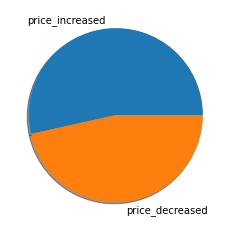

In [9]:
##plotting labels
plt.pie(news_data['Label'].value_counts(),shadow=True,labels=['price_increased','price_decreased'])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


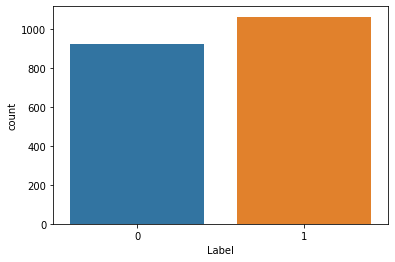

In [10]:
sns.countplot(news_data['Label'])
plt.show()

In [11]:
news_data['Date'].sort_values(ascending=False)

1988    2016-07-01
1987    2016-06-30
1986    2016-06-29
1985    2016-06-28
1984    2016-06-27
           ...    
4       2008-08-14
3       2008-08-13
2       2008-08-12
1       2008-08-11
0       2008-08-08
Name: Date, Length: 1986, dtype: object

In [12]:
X=news_data.drop('Label',axis=1)
X.head()

,Date,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",b'Georgian troops retreat from S. Osettain cap...,...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,b'Welcome To World War IV! Now In High Definit...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,2008-08-12,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...","b""The US military was surprised by the timing ...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
3,2008-08-13,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',"b""The commander of a Navy air reconnaissance s...",...,b'Elephants extinct by 2020?',b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...
4,2008-08-14,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abraham

In [13]:
y=news_data['Label']
y.head()

0    0
1    1
2    0
3    0
4    1
Name: Label, dtype: int64

In [14]:
## splitiing into train test
from sklearn.model_selection import train_test_split

In [15]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=42,shuffle=True)

In [16]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((1588, 26), (1588,), (398, 26), (398,))

In [17]:
y_train.value_counts()

1    851
0    737
Name: Label, dtype: int64

In [18]:
y_test.value_counts()

1    211
0    187
Name: Label, dtype: int64

In [19]:
X_train.head()

,Date,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
1789,2015-09-17,"Efficiency up, turnover down: Sweden experimen...",7.9-Magnitude Earthquake Strikes off the Coast...,"HPV vaccine should be free for boys, says moth...",US priests accused of sex abuse get a second c...,BBC News: A Russian prank caller has said he a...,Nobel director regretted Obama peace prize.,Saudi Arabia: Juvenile prisoner faces 'death b...,University of Sydney Student Smashes NASA Reco...,Iceland's capital declares boycott of Israeli ...,...,Rising number of employees reporting mental he...,UK Judge gives Asian pedophile harsher sentenc...,Exxon Believed Deep Dive Into Climate Research...,Jewish Man Dies as Rocks Pelt His Car in East ...,World Wide Fund for Nature says nearly half th...,"Threatened, starved: Cook reveals life at Saud...",Global study reveals soaring antibiotic resist...,Burkina Faso 'coup': Presidential guard dissol...,Malicious Cisco router backdoor found on 79 mo...,Russian Authorities Close Down American Center...
367,2010-01-25,b'France considers banning the burqa',"b""Turkey's prime minister: Israel Commits War ...","b""Airline passengers have 'no right' to refuse...","b""Haiti's head Voodoo priest question Church o...","b'My cousin, who says that she is hungry and h...","b'Israel cracks down on NGO workers: Oxfam, Do...",b'Canada is quickly turning into a police stat...,"b""US Television is reporting riots in Haiti. W...",b'China to jail people who eat dogs or cats',...,"b""Britain awaits Blair's Iraq testimony - Lond...","b""British film-makers uncover Trajan's hidden ...","b""Venezuela - Thousands of students marched to...",b'A Jew a Muslim and some Christians ',"b""Trying to tame Tokyo's adult playground""",b'Ministry of Justice lists eco-activists alon...,b'Report: Al Qaeda Weapons of Mass Destruction...,b'Just received this short press release from ...,b'Worst. Plan. Ever?: Britain and Japan have a...,b'The new Miss England is an Iraqi war veteran...
1009,2012-08-09,Islamist sect found living underground near Ru...,Germany's top court has ruled that homosexual...,A Roman trading ship from the time of the Caes...,Bolivia to ban Coca-Cola to mark the 'end of c...,Parkinsons Sufferer Arrested for Not Smiling a...,wikileaks under DDOS attack again,Superpower Denied? Why Chinas Rise May Have Al...,Sikhs angry at protests against US in India,A majority of Australians believe the WikiLeak...,...,New French government moves against Roma camps,Global Food Reserves Falling As Drought Wilts ...,Spanish Mayor &amp; supporters in southern Spa...,U.S. gives military aid to nations with child ...,Pakistani Taliban threaten to kill Imran Khan:...,Chile cracks down on violent student protest: ...,Rohingya Muslims persecuted by Rakhine Buddhis...,More Abandoned Children As Europe Austerity We...,Conservative Australian Prime Minister Howard ...,Colombia Drug Lord 'Sebastian' Arrested - He w...
1234,2013-07-05,Canadian soldiers in Afghanistan were told by ...,Bolivian President Evo Morales says he won't h...,US President Barack Obama has been urged to ap...,Tech firms including Microsoft are said to vol...,Iranian swimmer Elham Asghari swam 20km in ful...,If you think that government and the financial...,CIA whistleblower to Snowden: Do not cooperate...,Egypt army opens fire on pro-Morsi protesters ...,Icelandic parliament refuses to grant Snowden ...,...,Muslim Brotherhood accuses Egypt's new preside...,Forcing down Evo Morales's plane was an act of...,Bolivian President threatens to shut down U.S....,"Early in Obama's first term, some 78 percent o...",EU votes to support suspending U.S. data shari...,Russia criticises European states for 'unfrien...,India passes worlds largest Food Security bill,US sends Irish Government arrest warrant for S...,Only six members of Icelandic Parliament are i...,China and Russia start largest-ever joint mili...
581,2010-11-29,The hypocrisy of the med

In [20]:
#X_train.index

In [21]:
len(X_train)

1588

In [22]:
#df_train = news_data[news_data['Date'] < '20150101']

In [23]:
#df_train.head()

## Preprocessing Steps

In [24]:
## function to removing punctuations
def clean_data(dataset):
    data = dataset.iloc[:,2:27]
    data.replace("[^a-zA-Z]", " ", regex=True, inplace=True)
    return data

In [25]:
## function to convert all headlines into single coulumn
def combine_data(data):
    headlines = []
    for i in range(len(data.index)):
        headlines.append(' '.join(str(x) for x in data.iloc[i, :]))
    return headlines

In [26]:
## function to perform lemmatization 
def lemmatize_data(data, lemmatizer):
    cleaned_dataset = []
    for i in range(len(data)):
        clean_text = data[i].lower()
        clean_text = clean_text.split()
        clean_text = [lemmatizer.lemmatize(word) for word in clean_text if word not in stopwords.words('english')]
        cleaned_dataset.append(' '.join(clean_text))
    return cleaned_dataset

In [27]:
## cleaning train and test data
train_clean=clean_data(X_train)
test_clean=clean_data(X_test)

C:\Users\Great Andhra\AppData\Roaming\Python\Python38\site-packages\pandas\core\frame.py:4521: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [28]:
##single list
train_combined=combine_data(train_clean)
test_combined=combine_data(test_clean)

In [29]:
##lemmatization
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
lemmatizer=WordNetLemmatizer()
train_data=lemmatize_data(train_combined,lemmatizer)

In [30]:
test_data=lemmatize_data(test_combined,lemmatizer)

In [31]:
##count vectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [32]:
cv=CountVectorizer(ngram_range=(2,2))

In [33]:
train_data_new=cv.fit_transform(train_data)

In [34]:
test_data_new=cv.transform(test_data)

In [35]:
train_data_new.shape

(1588, 330237)

In [36]:
test_data_new.shape

(398, 330237)

In [42]:
len(train_data),len(test_data)

(1588, 398)

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
rfc=RandomForestClassifier(250,criterion='entropy')

In [46]:
rfc.fit(train_data_new,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=250)

In [47]:
y_train_pred=rfc.predict(train_data_new)

In [48]:
from sklearn import metrics

In [49]:
metrics.accuracy_score(y_train,y_train_pred)

1.0

In [50]:
metrics.confusion_matrix(y_train,y_train_pred)

array([[737,   0],
       [  0, 851]], dtype=int64)

In [52]:
y_test_pred=rfc.predict(test_data_new)

In [53]:
metrics.accuracy_score(y_test,y_test_pred)

0.535175879396985

In [54]:
metrics.confusion_matrix(y_test,y_test_pred)

array([[  4, 183],
       [  2, 209]], dtype=int64)

In [55]:
metrics.roc_auc_score(y_test,y_test_pred)

0.5059558506728844

In [57]:
from keras.preprocessing.text import Tokenizer

In [58]:
train_data

['magnitude earthquake strike coast chile hpv vaccine free boy say mother paid vaccine free girl grade cost boy u priest accused sex abuse get second chance relocating south america catholic church allowed priest accused sexually abusing child united state europe relocate poor parish south america yearlong investigation found bbc news russian prank caller said colleague tricked sir elton john thinking president vladimir putin called discus gay right nobel director regretted obama peace prize saudi arabia juvenile prisoner face death crucifixion appeal dismissed university sydney student smash nasa record fuel efficiency mar back tank fuel iceland capital declares boycott israeli good tsunami alert chile hit powerful earthquake final push tpp set end september school ordered pay student million sex abuse female principal ultra orthadox jewish school principal fled israel fighting extradition migrant break police line croatia serbia border racist racism based islam say supreme council me

In [59]:
tokenizer=Tokenizer(7000)
tokenizer.fit_on_texts(train_data)

In [66]:
sequences=tokenizer.texts_to_sequences(train_data)

In [68]:
len(sequences)

1588

In [94]:
tokenizer=Tokenizer(7000)
sequences_test=tokenizer.fit_on_texts(test_data)

In [96]:
sequences_test

In [69]:
len(tokenizer.word_index)

25761

In [71]:
from keras.preprocessing.sequence import pad_sequences

In [100]:
data=pad_sequences(sequences,maxlen=20)

In [101]:
data.shape

(1588, 20)

In [102]:
data[0]

array([4160,   50, 1980,    2,   25,  223,  418,   91,  938,  359,   25,
          9,  805,    2,  490,   91,  938,  359,    4,  375])

In [108]:
from keras import Sequential
import keras
from keras.layers import Dense,GRU,Embedding,SimpleRNN

In [109]:
model=Sequential()
model.add(Embedding(7000,40,input_length=20))
model.add(SimpleRNN(100))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer=keras.optimizers.Adam(lr=0.001),metrics=['accuracy'])

In [104]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 20, 40)            280000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 100)               14100     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 294,201
Trainable params: 294,201
Non-trainable params: 0
_________________________________________________________________


In [110]:
X_final=np.array(data)
y_final=np.array(y_train)

In [85]:
y_final.shape

(1588,)

In [88]:
y_train.shape

(1588,)

In [90]:
X_final.shape

(1588, 120)

In [111]:
model.fit(X_final,y_final,epochs=30,batch_size=32,validation_split=0.2)

Epoch 1/30
40/40 [==============================] - 5s 29ms/step - loss: 0.6964 - accuracy: 0.4978 - val_loss: 0.6916 - val_accuracy: 0.5157
Epoch 2/30
40/40 [==============================] - 1s 16ms/step - loss: 0.4720 - accuracy: 0.8526 - val_loss: 1.0534 - val_accuracy: 0.5314
Epoch 3/30
40/40 [==============================] - 1s 14ms/step - loss: 0.0441 - accuracy: 0.9974 - val_loss: 1.3172 - val_accuracy: 0.5094
Epoch 4/30
40/40 [==============================] - 1s 17ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 1.4762 - val_accuracy: 0.5252
Epoch 5/30
40/40 [==============================] - 1s 16ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 1.5811 - val_accuracy: 0.5126
Epoch 6/30
40/40 [==============================] - 1s 17ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 1.6467 - val_accuracy: 0.5063
Epoch 7/30
40/40 [==============================] - 1s 17ms/step - loss: 8.2604e-04 - accuracy: 1.0000 - val_loss: 1.7003 - val_accuracy: 0.5031
Epoch 8/3